In [1]:
# Numerical/scientific computing packages.
import numpy as np
import scipy
import copy
import pandas as pd
import seaborn as sns
import csv

# Machine learning package.
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error

# Useful for saving our models.
import pickle

# Plotting packages.
import matplotlib
import matplotlib.pyplot as plt

print('Finished successfully loading packages')

Finished successfully loading packages


In [2]:
continous_predictors= ['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_sec']
categorical_predictors = ['mode_Major', 'key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G']
labels = ['genre_label', 'music_genre']
predictors_all = ["artist_name", "track_name"] + continous_predictors + categorical_predictors + labels

df = pd.read_csv("processed_dataset.csv")
print("Loaded the DataFrame into the memory")

Loaded the DataFrame into the memory


In [3]:
df = df.drop("Unnamed: 0", axis=1)
df.shape

(46165, 27)

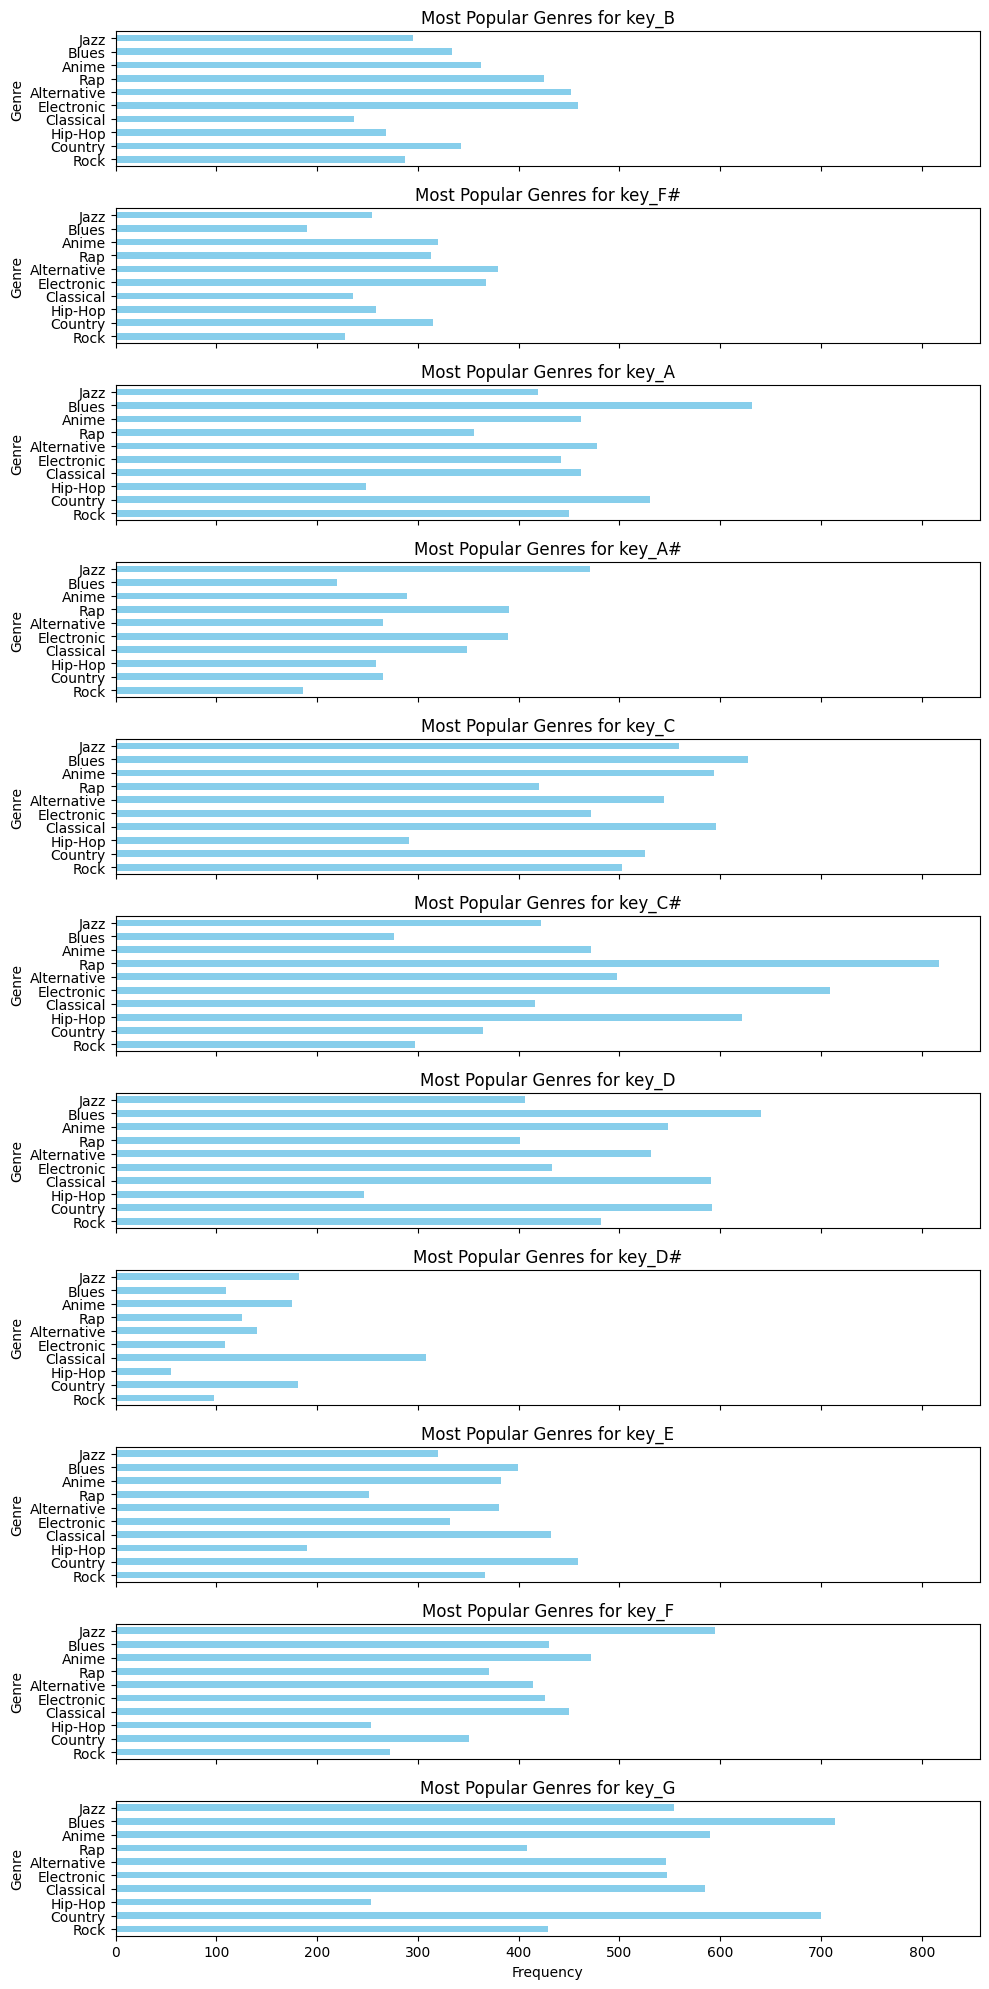

In [4]:
import matplotlib.pyplot as plt
original_genres_order = ['Rock', 'Country', 'Hip-Hop', 'Classical', 'Electronic', 'Alternative', 'Rap', 'Anime', 'Blues', 'Jazz']

keys = ['key_B', 'key_F#', 'key_A', 'key_A#', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_G']
fig, axes = plt.subplots(nrows=len(keys), figsize=(10, 20), sharex=True)

for i, key in enumerate(keys):
    filtered_df = df[df[key] == 1]
    genre_counts = filtered_df['music_genre'].value_counts()
    genre_counts = genre_counts.reindex(original_genres_order)
    
    ax = axes[i] if len(keys) > 1 else axes
    genre_counts.plot(kind='barh', ax=ax, color='skyblue')
    ax.set_title("Most Popular Genres for {}".format(key))
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Genre')

plt.tight_layout()
plt.show()

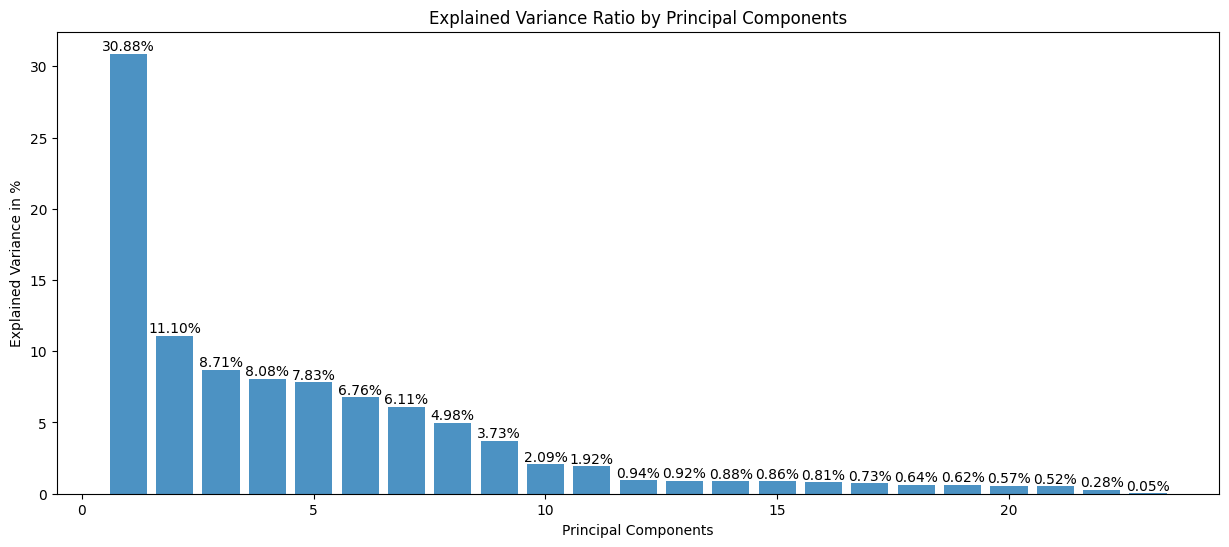

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df_to_standardize = df[continous_predictors]
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_to_standardize)
df_standardized = pd.DataFrame(standardized_data, columns=df_to_standardize.columns)
df_standardized.columns = [col + "_stand" for col in df_to_standardize.columns]

final_df = pd.concat([df_standardized, df[categorical_predictors]], axis=1)

pca = PCA(n_components=final_df.shape[1])
principalComponents = pca.fit_transform(final_df)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(15, 6))
bars = plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100, alpha=0.8, align='center')

for bar, value in zip(bars, explained_variance):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value * 100:.2f}%', ha='center', va='bottom')

plt.ylabel('Explained Variance in %')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

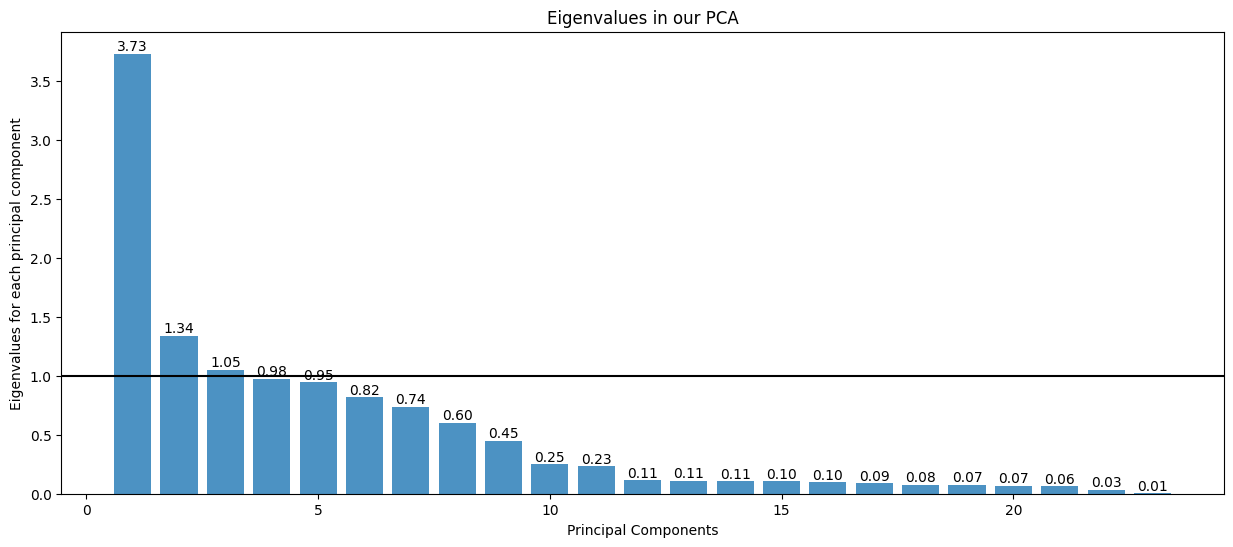

In [6]:
# eigenvalues
eigenvalues = pca.explained_variance_

plt.figure(figsize=(15, 6))
bars = plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.8, align='center')
plt.axhline(y=1, color='k', linestyle='-')  # Add a horizontal line at y=0

for bar, value in zip(bars, eigenvalues):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')

plt.ylabel('Eigenvalues for each principal component')
plt.xlabel('Principal Components')
plt.title('Eigenvalues in our PCA')
plt.show()

In [7]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(final_df)
loadings = pca.components_
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component #1', 'principal component #2', 'principal component #3'])
loadingsDf = pd.DataFrame(data=loadings.T, columns=['PC1_loading', 'PC2_loading', 'PC3_loading'], index=final_df.columns)

print("Principal Component Loadings:")
loadingsDf

Principal Component Loadings:


,PC1_loading,PC2_loading,PC3_loading
popularity_stand,-0.242368,-0.379160,0.204803
acousticness_stand,0.423264,-0.225156,0.060178
danceability_stand,-0.304862,-0.455690,-0.055836
energy_stand,-0.439473,0.308104,-0.084110
instrumentalness_stand,0.335894,0.102849,-0.101735
liveness_stand,-0.085502,0.362682,0.575464
loudness_stand,-0.456674,0.175551,-0.071989
speechiness_stand,-0.171819,-0.248160,0.661077
tempo_stand,-0.153017,0.343833,-0.117142
valence_stand,-0.281961,-0.154016,-0.344252


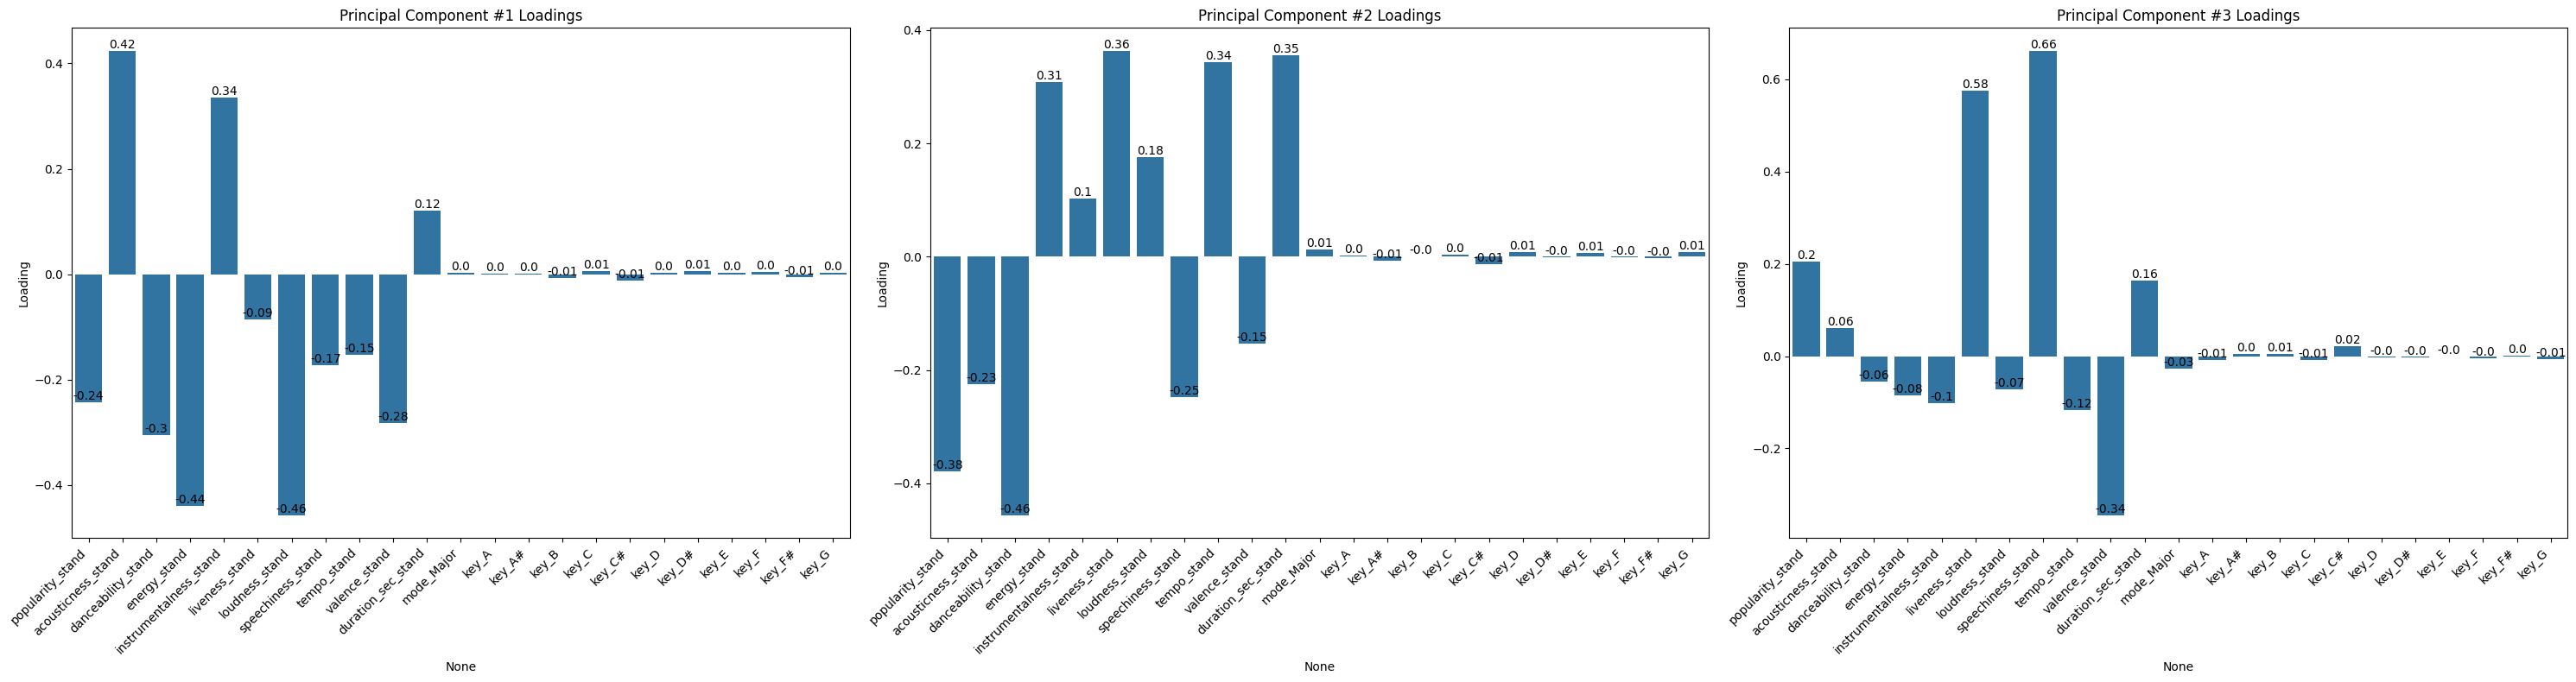

In [8]:
import seaborn as sns

loadingsDf = pd.DataFrame(data=loadings.T, columns=['PC1_loading', 'PC2_loading', 'PC3_loading'], index=final_df.columns)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 8))

for i in range(3):
    sns.barplot(x=loadingsDf.index, y=f'PC{i+1}_loading', data=loadingsDf, ax=axes[i])
    axes[i].set_title(f'Principal Component #{i+1} Loadings')
    axes[i].set_ylabel('Loading')
    
    axes[i].set_xticks(range(len(loadingsDf.index)))
    axes[i].set_xticklabels(loadingsDf.index, rotation=45, ha='right')

    for idx, value in enumerate(loadingsDf[f'PC{i+1}_loading']):
        axes[i].text(idx, value, round(value, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [9]:
# let's greedily choose the loadings
threshold = 0.35
sorted_loadings = loadingsDf.abs().sort_values(by=['PC1_loading', 'PC2_loading', 'PC3_loading'], ascending=False)

significant_variables_pc1 = sorted_loadings[sorted_loadings['PC1_loading'].abs() > threshold][['PC1_loading']].sort_values(by=['PC1_loading'], ascending=False)
significant_variables_pc2 = sorted_loadings[sorted_loadings['PC2_loading'].abs() > threshold][['PC2_loading']].sort_values(by=['PC2_loading'], ascending=False)
significant_variables_pc3 = sorted_loadings[sorted_loadings['PC3_loading'].abs() > threshold][['PC3_loading']].sort_values(by=['PC3_loading'], ascending=False)

print("Significant variables for PC1:")
print(significant_variables_pc1)
print("\nSignificant variables for PC2:")
print(significant_variables_pc2)
print("\nSignificant variables for PC3:")
print(significant_variables_pc3)

Significant variables for PC1:
                    PC1_loading
loudness_stand         0.456674
energy_stand           0.439473
acousticness_stand     0.423264

Significant variables for PC2:
                    PC2_loading
danceability_stand     0.455690
popularity_stand       0.379160
liveness_stand         0.362682
duration_sec_stand     0.354830

Significant variables for PC3:
                   PC3_loading
speechiness_stand     0.661077
liveness_stand        0.575464


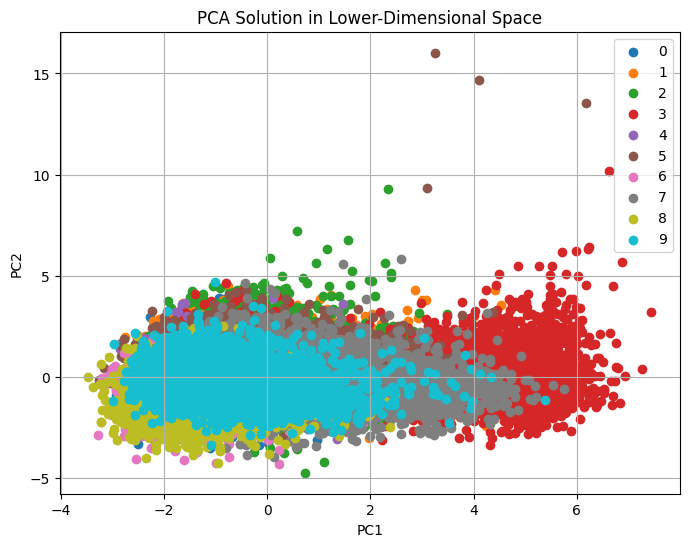

In [10]:
df = pd.concat([final_df, df['genre_label']], axis=1)

pca = PCA(n_components=2)

X = df.drop(columns=['genre_label'])
y = df['genre_label']

X_pca = pca.fit_transform(X, y)

# Plot the transformed data
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Solution in Lower-Dimensional Space')
plt.legend()
plt.grid(True)
plt.show()

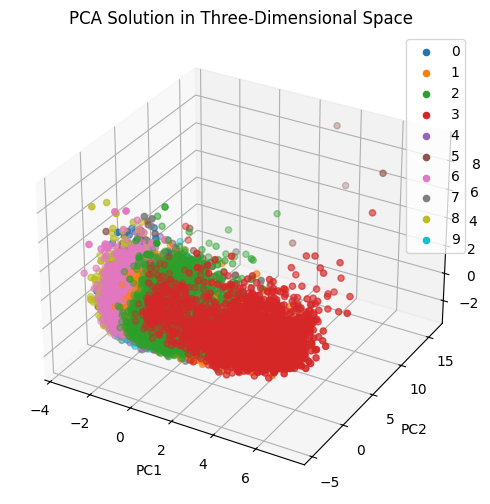

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

X = df.drop(columns=['genre_label'])
y = df['genre_label']

X_pca = pca.fit_transform(X, y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(y):
    ax.scatter(X_pca[y == label, 0], X_pca[y == label, 1], X_pca[y == label, 2], label=label)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA Solution in Three-Dimensional Space')
ax.legend()
plt.grid(True)
plt.show()

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = df.drop("genre_label", axis=1)
y = df["genre_label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=18618637)
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=18618637)

df = pd.concat([final_df, df['genre_label']], axis=1)
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

feature_importance = lda.coef_[0]  # Coefficients associated with each feature

for feature, importance in zip(df.drop(columns=['genre_label']).columns.to_list(), feature_importance):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: popularity_stand, Importance: 1.0871710552216316
Feature: acousticness_stand, Importance: -0.41886052829795994
Feature: danceability_stand, Importance: -0.1780260910465645
Feature: energy_stand, Importance: 0.08846995159022768
Feature: instrumentalness_stand, Importance: -0.39533254320469047
Feature: liveness_stand, Importance: -0.00426495711678078
Feature: loudness_stand, Importance: 0.4499411441112252
Feature: speechiness_stand, Importance: -0.05106667933946361
Feature: tempo_stand, Importance: -0.03095286735269461
Feature: valence_stand, Importance: -0.219018794675905
Feature: duration_sec_stand, Importance: -0.19765592485536534
Feature: mode_Major, Importance: 0.0005819862803592346
Feature: key_A, Importance: 0.1801692655095904
Feature: key_A#, Importance: 0.028652043926022688
Feature: key_B, Importance: 0.27323852524946246
Feature: key_C, Importance: 0.15081735082056785
Feature: key_C#, Importance: -0.02125158972069768
Feature: key_D, Importance: 0.1431554334773056
Featur

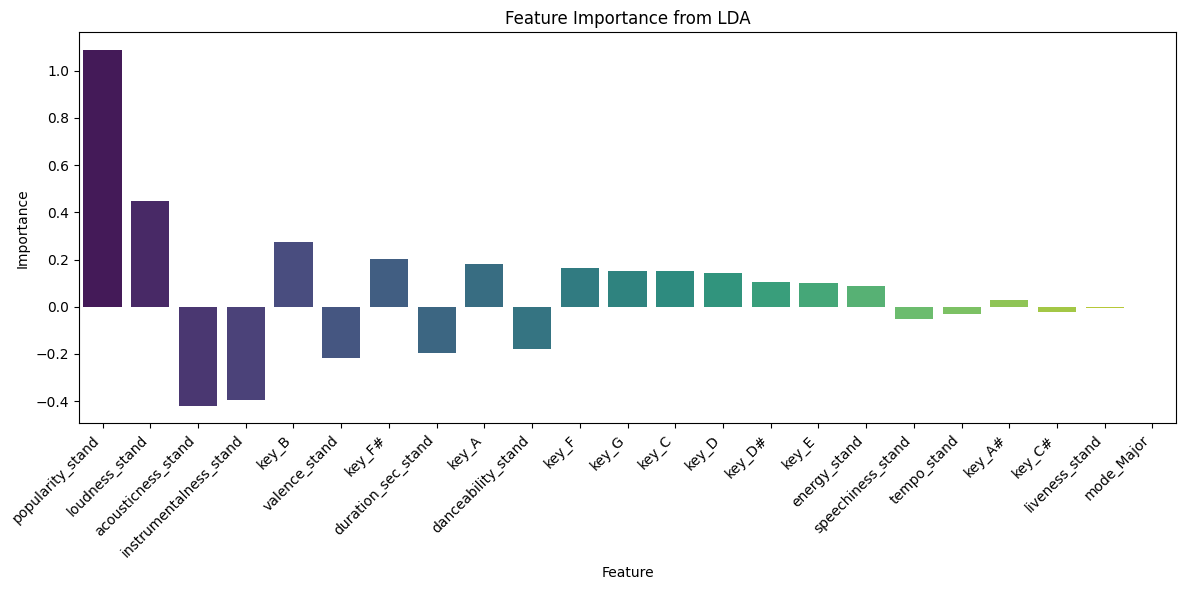

In [13]:
import matplotlib.pyplot as plt

sorted_features = sorted(zip(df.drop(columns=['genre_label']).columns, feature_importance), key=lambda x: abs(x[1]), reverse=True)
sorted_feature_names = [feature for feature, _ in sorted_features]
sorted_importance_values = [importance for _, importance in sorted_features]

plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_feature_names, y=sorted_importance_values, hue=sorted_feature_names, palette="viridis", legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from LDA')
plt.tight_layout()
plt.show()

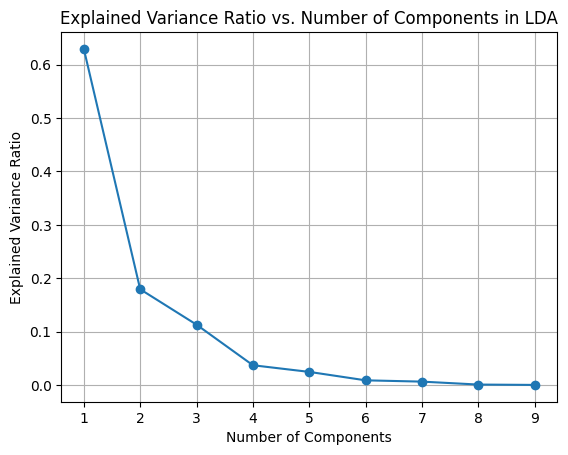

In [14]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

explained_variance_ratio = lda.explained_variance_ratio_

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components in LDA')
plt.grid(True)
plt.show()

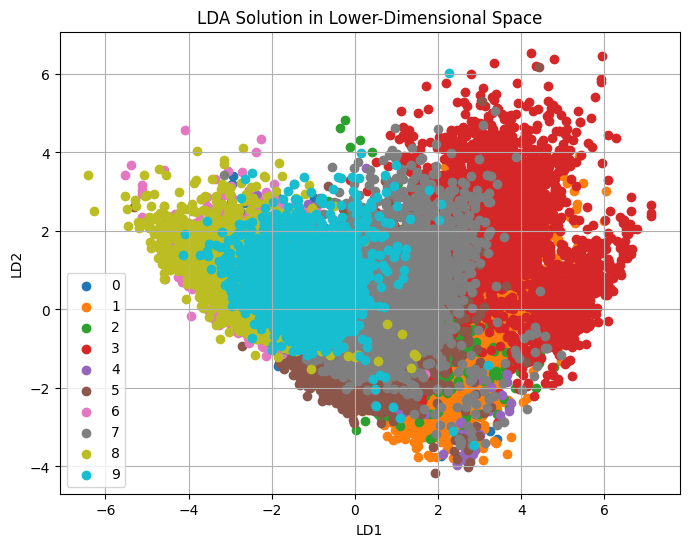

In [15]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


# Plot the transformed data
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_train_lda[y_train == label, 0], X_train_lda[y_train == label, 1], label=label)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA Solution in Lower-Dimensional Space')
plt.legend()
plt.grid(True)
plt.show()

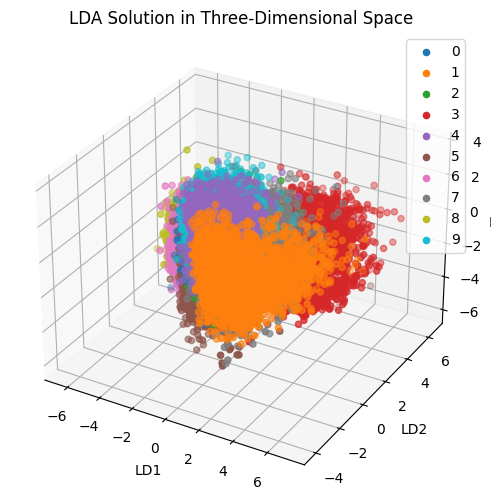

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(y_train):
    ax.scatter(X_train_lda[y_train == label, 0], X_train_lda[y_train == label, 1], X_train_lda[y_train == label, 2], label=label)

ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_zlabel('LD3')
ax.set_title('LDA Solution in Three-Dimensional Space')
ax.legend()
plt.grid(True)
plt.show()

### I would want to combine the features, which PCA and LDA analysis methods named to be the best, since they both yield great results

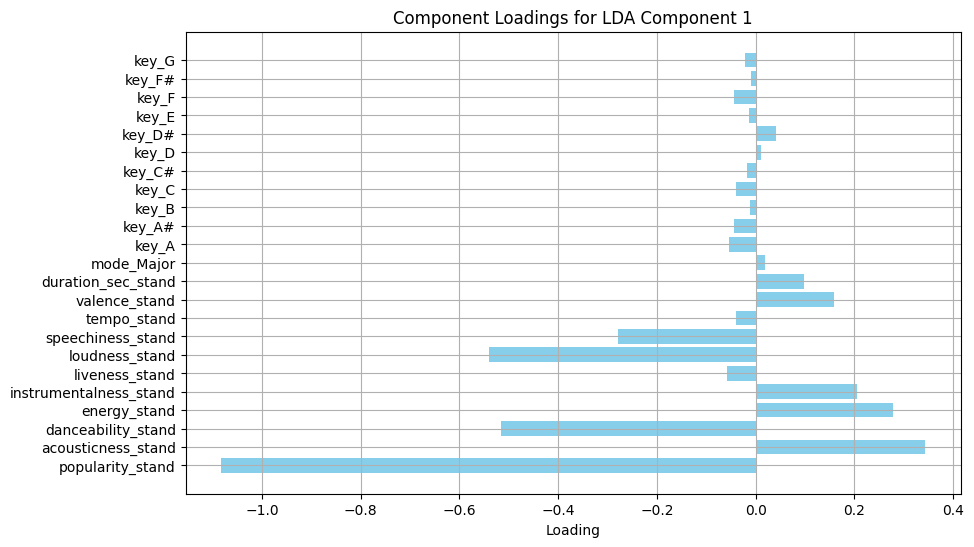

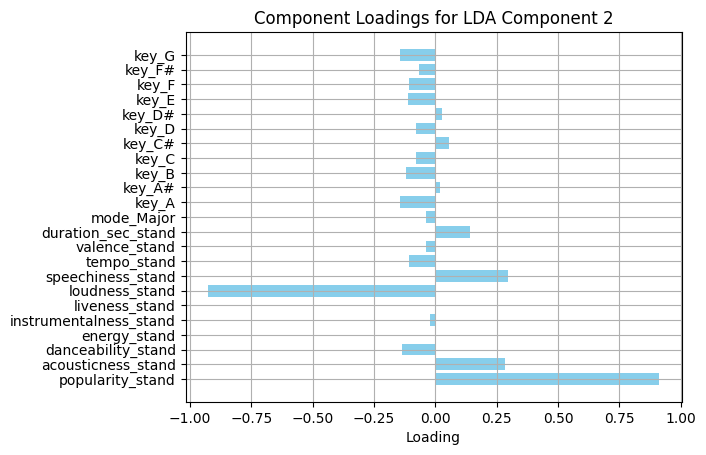

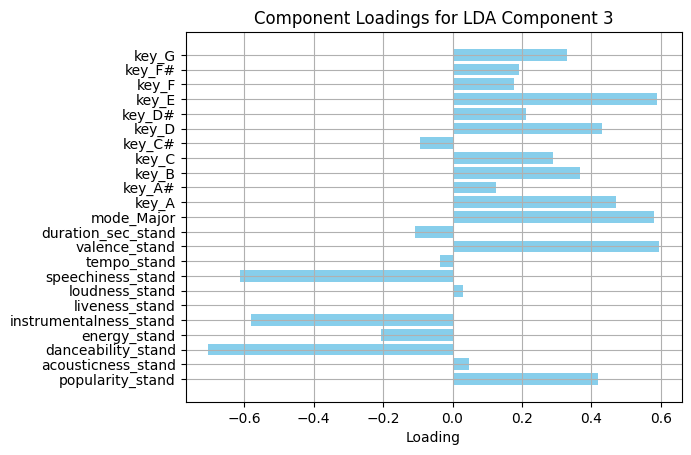

In [17]:
import numpy as np

lda = LinearDiscriminantAnalysis(n_components=3)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

component_loadings = lda.scalings_[:, :3]

# Visualize component loadings
plt.figure(figsize=(10, 6))
for i, component in enumerate(component_loadings.T):
    plt.barh(range(len(component)), component, color='skyblue')
    plt.yticks(range(len(component)), X.columns)
    plt.xlabel('Loading')
    plt.title(f'Component Loadings for LDA Component {i+1}')
    plt.grid(True)
    plt.show()

y_train_df = y_train
X_train_lda_df = pd.DataFrame(X_train_lda)
lda_x_testing_df = pd.DataFrame(X_test_lda)
lda_training_df = pd.concat([X_train_lda_df, y_train_df], axis=1)

In [18]:
threshold = 0.45

important_features = []
for i, component in enumerate(component_loadings.T):
    important_indices = np.where(np.abs(component) > threshold)[0]
    important_features.extend(important_indices)

important_features = np.unique(important_features)

print("Important Features:")
print(X.columns[important_features])

Important Features:
Index(['popularity_stand', 'danceability_stand', 'instrumentalness_stand',
       'loudness_stand', 'speechiness_stand', 'valence_stand', 'mode_Major',
       'key_A', 'key_E'],
      dtype='object')


In [19]:
df_names = ["lda_training.csv", "lda_x_testing.csv"]
dfs = [lda_training_df, lda_x_testing_df]
for idx, df in enumerate(dfs):
    df.to_csv(df_names[idx])

### Dimensionality reduction is done, now clustering
---